피처 설명

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [13]:
data.info() # 널값이 없다 ㅎㅎ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x25b7e50e688>,
 'caps': [<matplotlib.lines.Line2D at 0x25b7e50ed08>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b7e505f88>],
 'medians': [<matplotlib.lines.Line2D at 0x25b7e513b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b7e51b888>],
 'means': []}

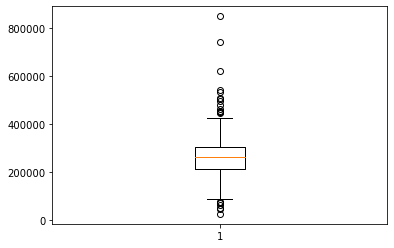

In [15]:
# platelets 75값이랑 최대값 차이가 너무 난다. ejection_fraction과 serum_creatinine 또한

plt.boxplot(data['platelets'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25b7e571dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x25b7e578bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b7e571548>],
 'medians': [<matplotlib.lines.Line2D at 0x25b7e57ba48>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b7e57bb88>],
 'means': []}

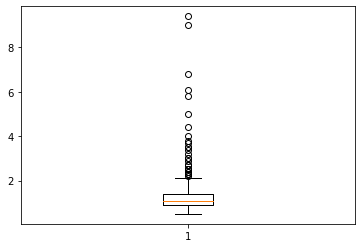

In [16]:
plt.boxplot(data['serum_creatinine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25b7e487c08>,
 'caps': [<matplotlib.lines.Line2D at 0x25b7e474048>,
 'boxes': [<matplotlib.lines.Line2D at 0x25b7e2f6c08>],
 'medians': [<matplotlib.lines.Line2D at 0x25b7e4b3448>],
 'fliers': [<matplotlib.lines.Line2D at 0x25b7e3c4248>],
 'means': []}

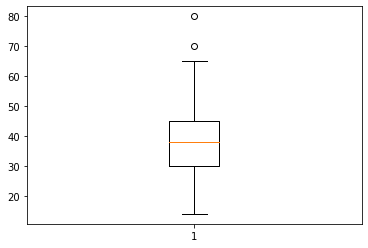

In [17]:
plt.boxplot(data['ejection_fraction'])

In [18]:
data.drop(['serum_creatinine', 'platelets'], axis=1, inplace=True)

In [19]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,130,1,0,4,1
1,55.0,0,7861,0,38,0,136,1,0,6,1
2,65.0,0,146,0,20,0,129,1,1,7,1
3,50.0,1,111,0,20,0,137,1,0,7,1
4,65.0,1,160,1,20,0,116,0,0,8,1


In [20]:
for column in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT'] :
    print('\n column name : ', column)
    print(data[column].value_counts())
    # 모두 불균형


 column name :  anaemia
0    170
1    129
Name: anaemia, dtype: int64

 column name :  diabetes
0    174
1    125
Name: diabetes, dtype: int64

 column name :  high_blood_pressure
0    194
1    105
Name: high_blood_pressure, dtype: int64

 column name :  smoking
0    203
1     96
Name: smoking, dtype: int64

 column name :  DEATH_EVENT
0    203
1     96
Name: DEATH_EVENT, dtype: int64


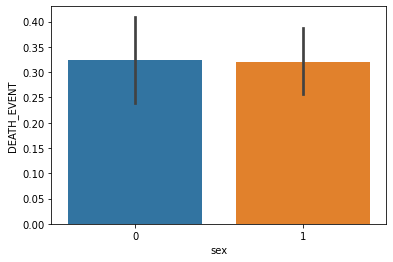

In [21]:
sns.barplot(x='sex', y='DEATH_EVENT', data=data)

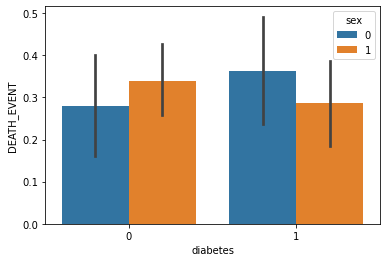

In [22]:
sns.barplot(x='diabetes', y='DEATH_EVENT', hue='sex', data=data)

In [31]:
from sklearn.preprocessing import StandardScaler

y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)
scaler = StandardScaler()
scaler.fit(X)
data_standardScaler = scaler.transform(X)
data_standardScaler_df = pd.DataFrame(data=data_standardScaler,
                              columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time'])

print(data_standardScaler_df.mean())
print(data_standardScaler_df.var())

age                         5.265205e-16
anaemia                     3.594301e-16
creatinine_phosphokinase    3.713120e-18
diabetes                    1.113936e-16
ejection_fraction           3.341808e-18
high_blood_pressure        -4.841909e-16
serum_sodium               -8.627435e-16
sex                        -5.940993e-18
smoking                    -3.861645e-17
time                       -1.069379e-16
dtype: float64
age                         1.003356
anaemia                     1.003356
creatinine_phosphokinase    1.003356
diabetes                    1.003356
ejection_fraction           1.003356
high_blood_pressure         1.003356
serum_sodium                1.003356
sex                         1.003356
smoking                     1.003356
time                        1.003356
dtype: float64


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
data_MinMaxScaler = scaler.transform(X)
data_MinMaxScaler_df = pd.DataFrame(data=data_MinMaxScaler,
                              columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time'])

print(data_MinMaxScaler_df.mean())
print(data_MinMaxScaler_df.var())

age                         0.378798
anaemia                     0.431438
creatinine_phosphokinase    0.071299
diabetes                    0.418060
ejection_fraction           0.364903
high_blood_pressure         0.351171
serum_sodium                0.675012
sex                         0.648829
smoking                     0.321070
time                        0.449327
dtype: float64
age                         0.046772
anaemia                     0.246122
creatinine_phosphokinase    0.015325
diabetes                    0.244102
ejection_fraction           0.032154
high_blood_pressure         0.228614
serum_sodium                0.015894
sex                         0.228614
smoking                     0.218716
time                        0.076290
dtype: float64


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier()
x = np.array(data_standardScaler_df.values.tolist())
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.7333333333333333

In [49]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [53]:
get_clf_eval(y_test, pred, 0.5)

TypeError: Singleton array array(0.5) cannot be considered a valid collection.

In [51]:
y_test

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [52]:
pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])